<a href="https://colab.research.google.com/github/asaurasieu/ParkingProjectFlask/blob/main/ModelYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Check if GPU is available
!nvidia-smi

# Set up the environment and install necessary packages
!pip install ultralytics==8.0.196
!pip install roboflow==1.1.48 --quiet

from IPython import display
display.clear_output()

# Import required libraries
import ultralytics
ultralytics.checks()  # Ensure YOLO installation is correct

from ultralytics import YOLO
from roboflow import Roboflow
import os

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.6/112.6 GB disk)


In [4]:
# Mount Google Drive to access your dataset
from google.colab import drive
drive.mount('/content/drive')

# Define dataset path on Google Drive
dataset_path = "/content/drive/MyDrive/train/Car-Model-1"  # Adjust this to the actual path in your Drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Verify dataset directory and data.yaml path
data_yaml_path = os.path.join(dataset_path, "data.yaml")
print("Dataset YAML path:", data_yaml_path)

Dataset YAML path: /content/drive/MyDrive/train/Car-Model-1/data.yaml


In [ ]:
# Train YOLOv8 Model
model_path = "yolov8s.pt"  # Using the small YOLOv8 model to reduce memory usage
img_size = 640  # Adjust image size if necessary

# Start training with GPU
!yolo task=detect mode=train model={model_path} data={data_yaml_path} epochs=100 imgsz={img_size} plots=True device=0

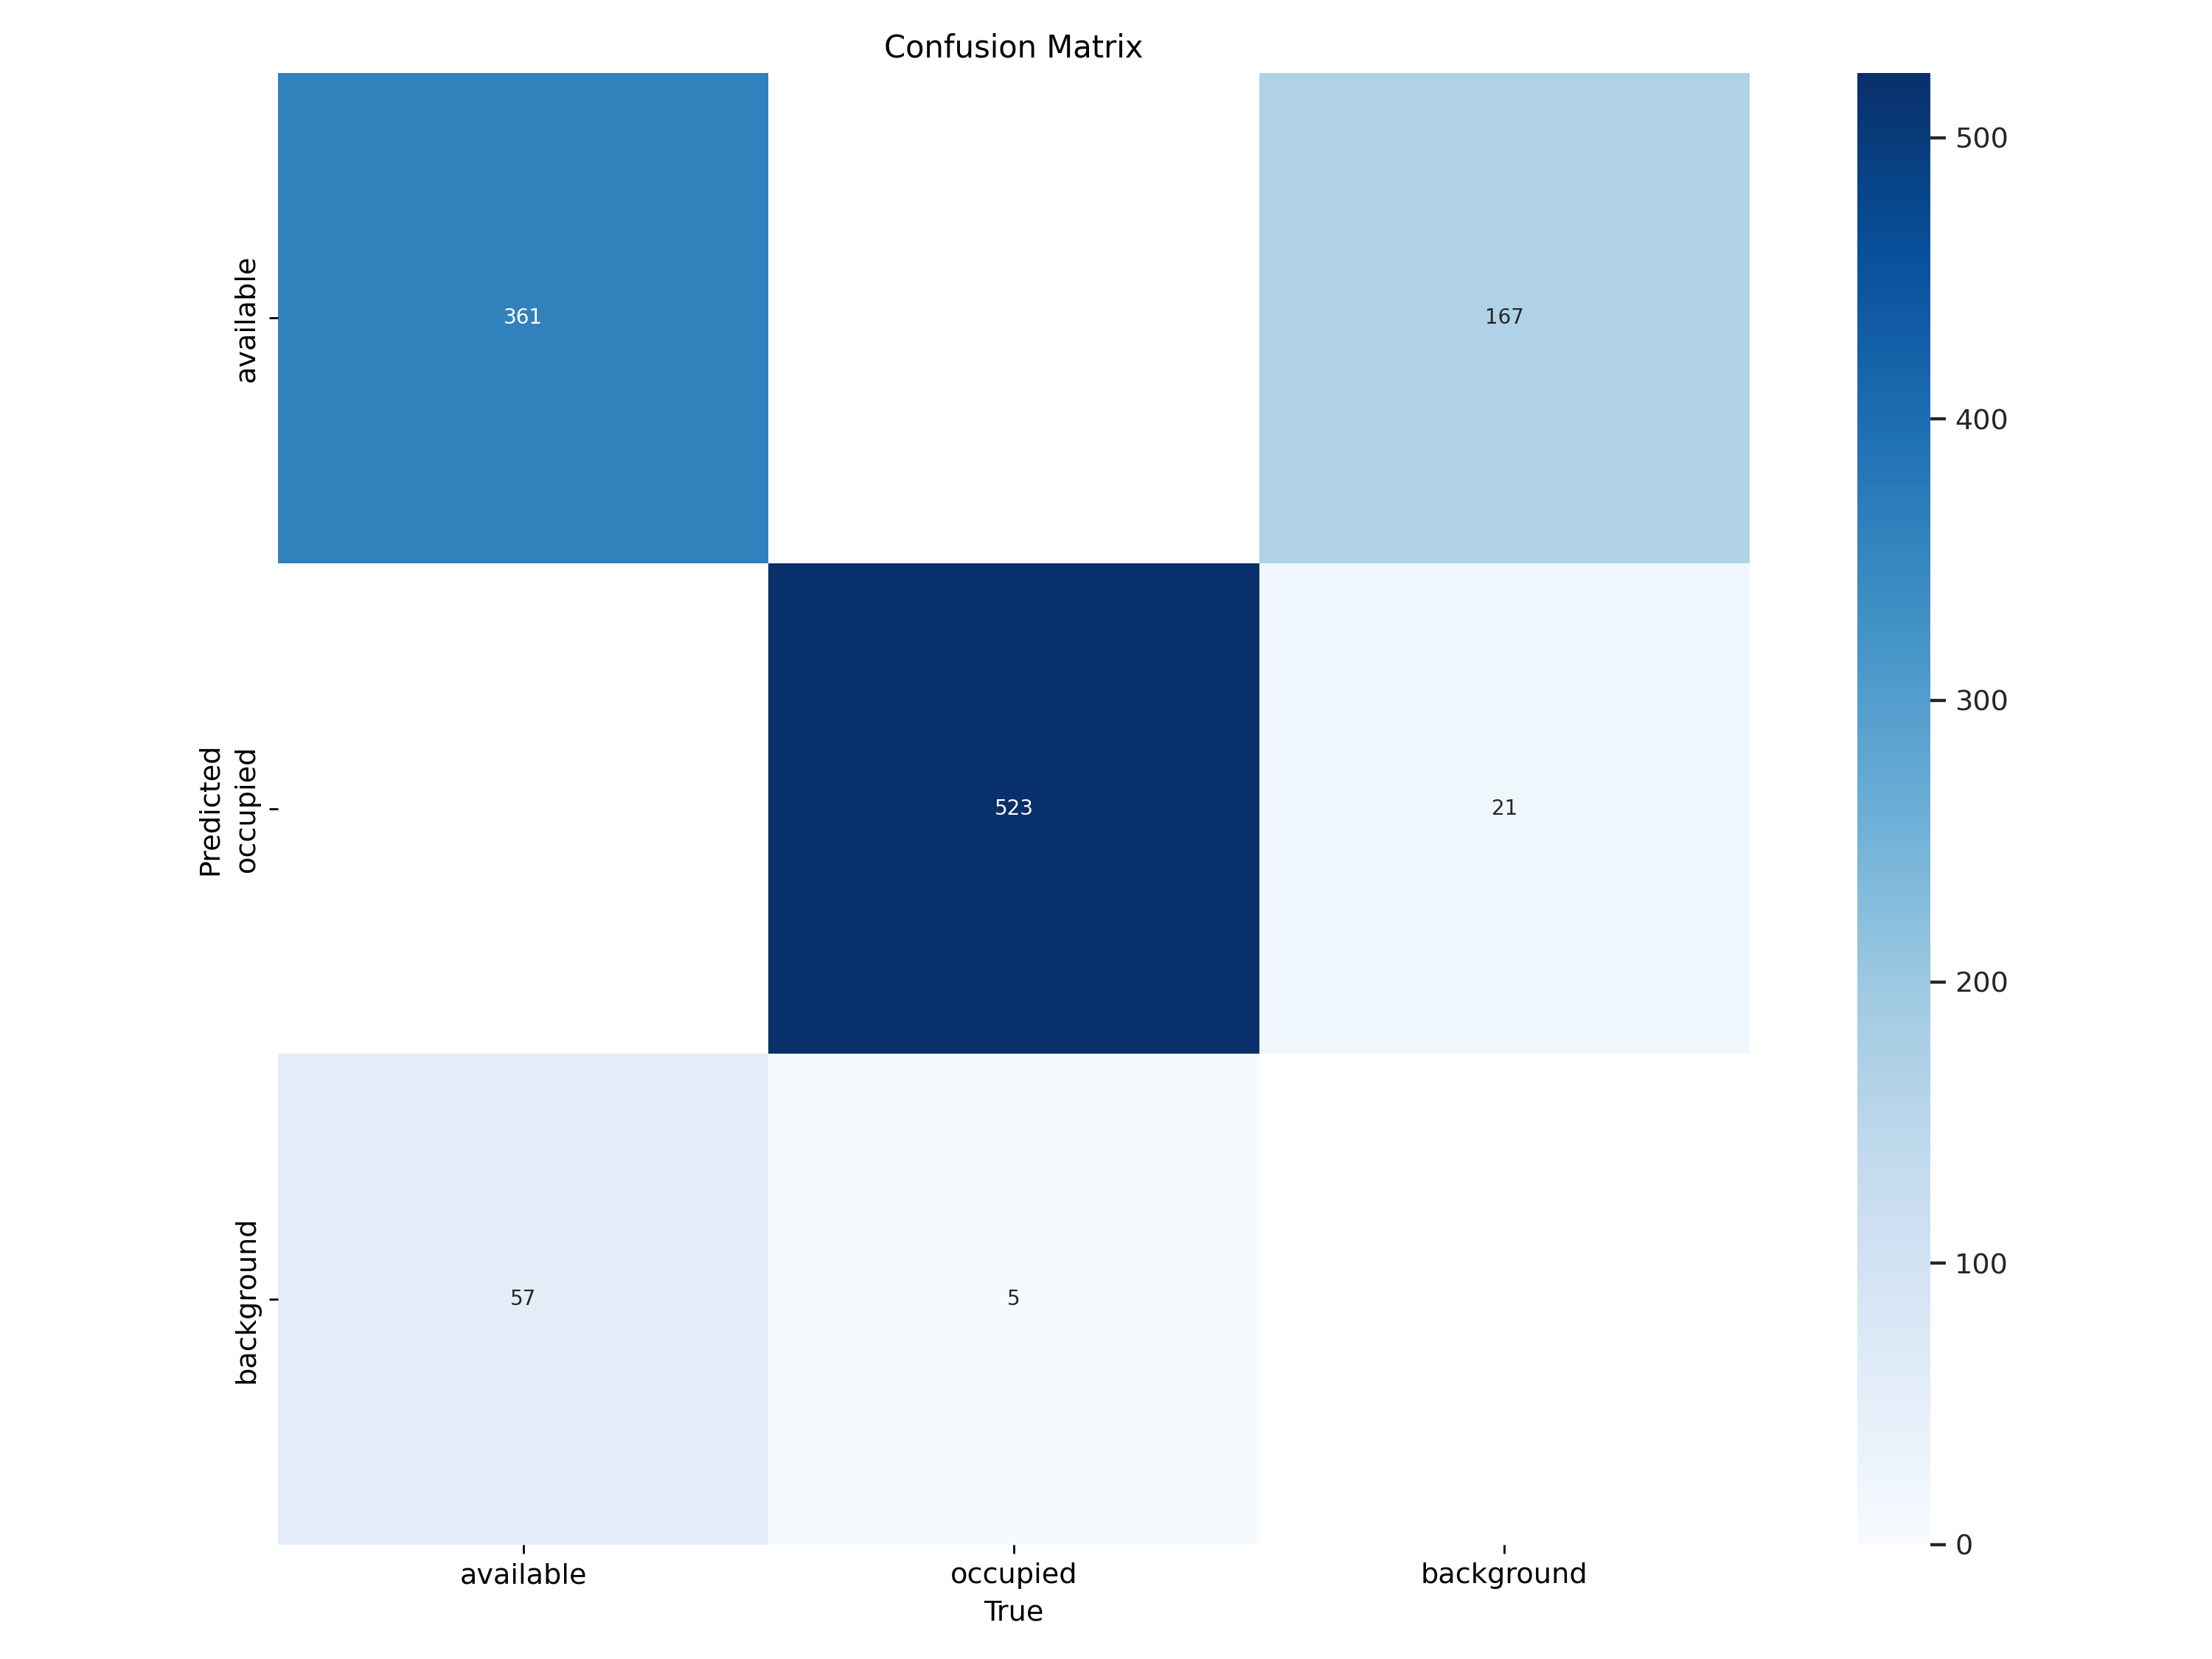

In [7]:
from IPython.display import Image, display
import os

# Define the path to your results directory and confusion matrix image
HOME = os.getcwd()  # Define home directory, or replace with specific path if needed
result_path = os.path.join(HOME, 'runs', 'detect', 'train2', 'confusion_matrix.png')

# Check if the confusion matrix image exists, then display it
if os.path.exists(result_path):
    display(Image(filename=result_path, width=600))
else:
    print("Confusion matrix image not found. Ensure training has completed and the file path is correct.")

/content


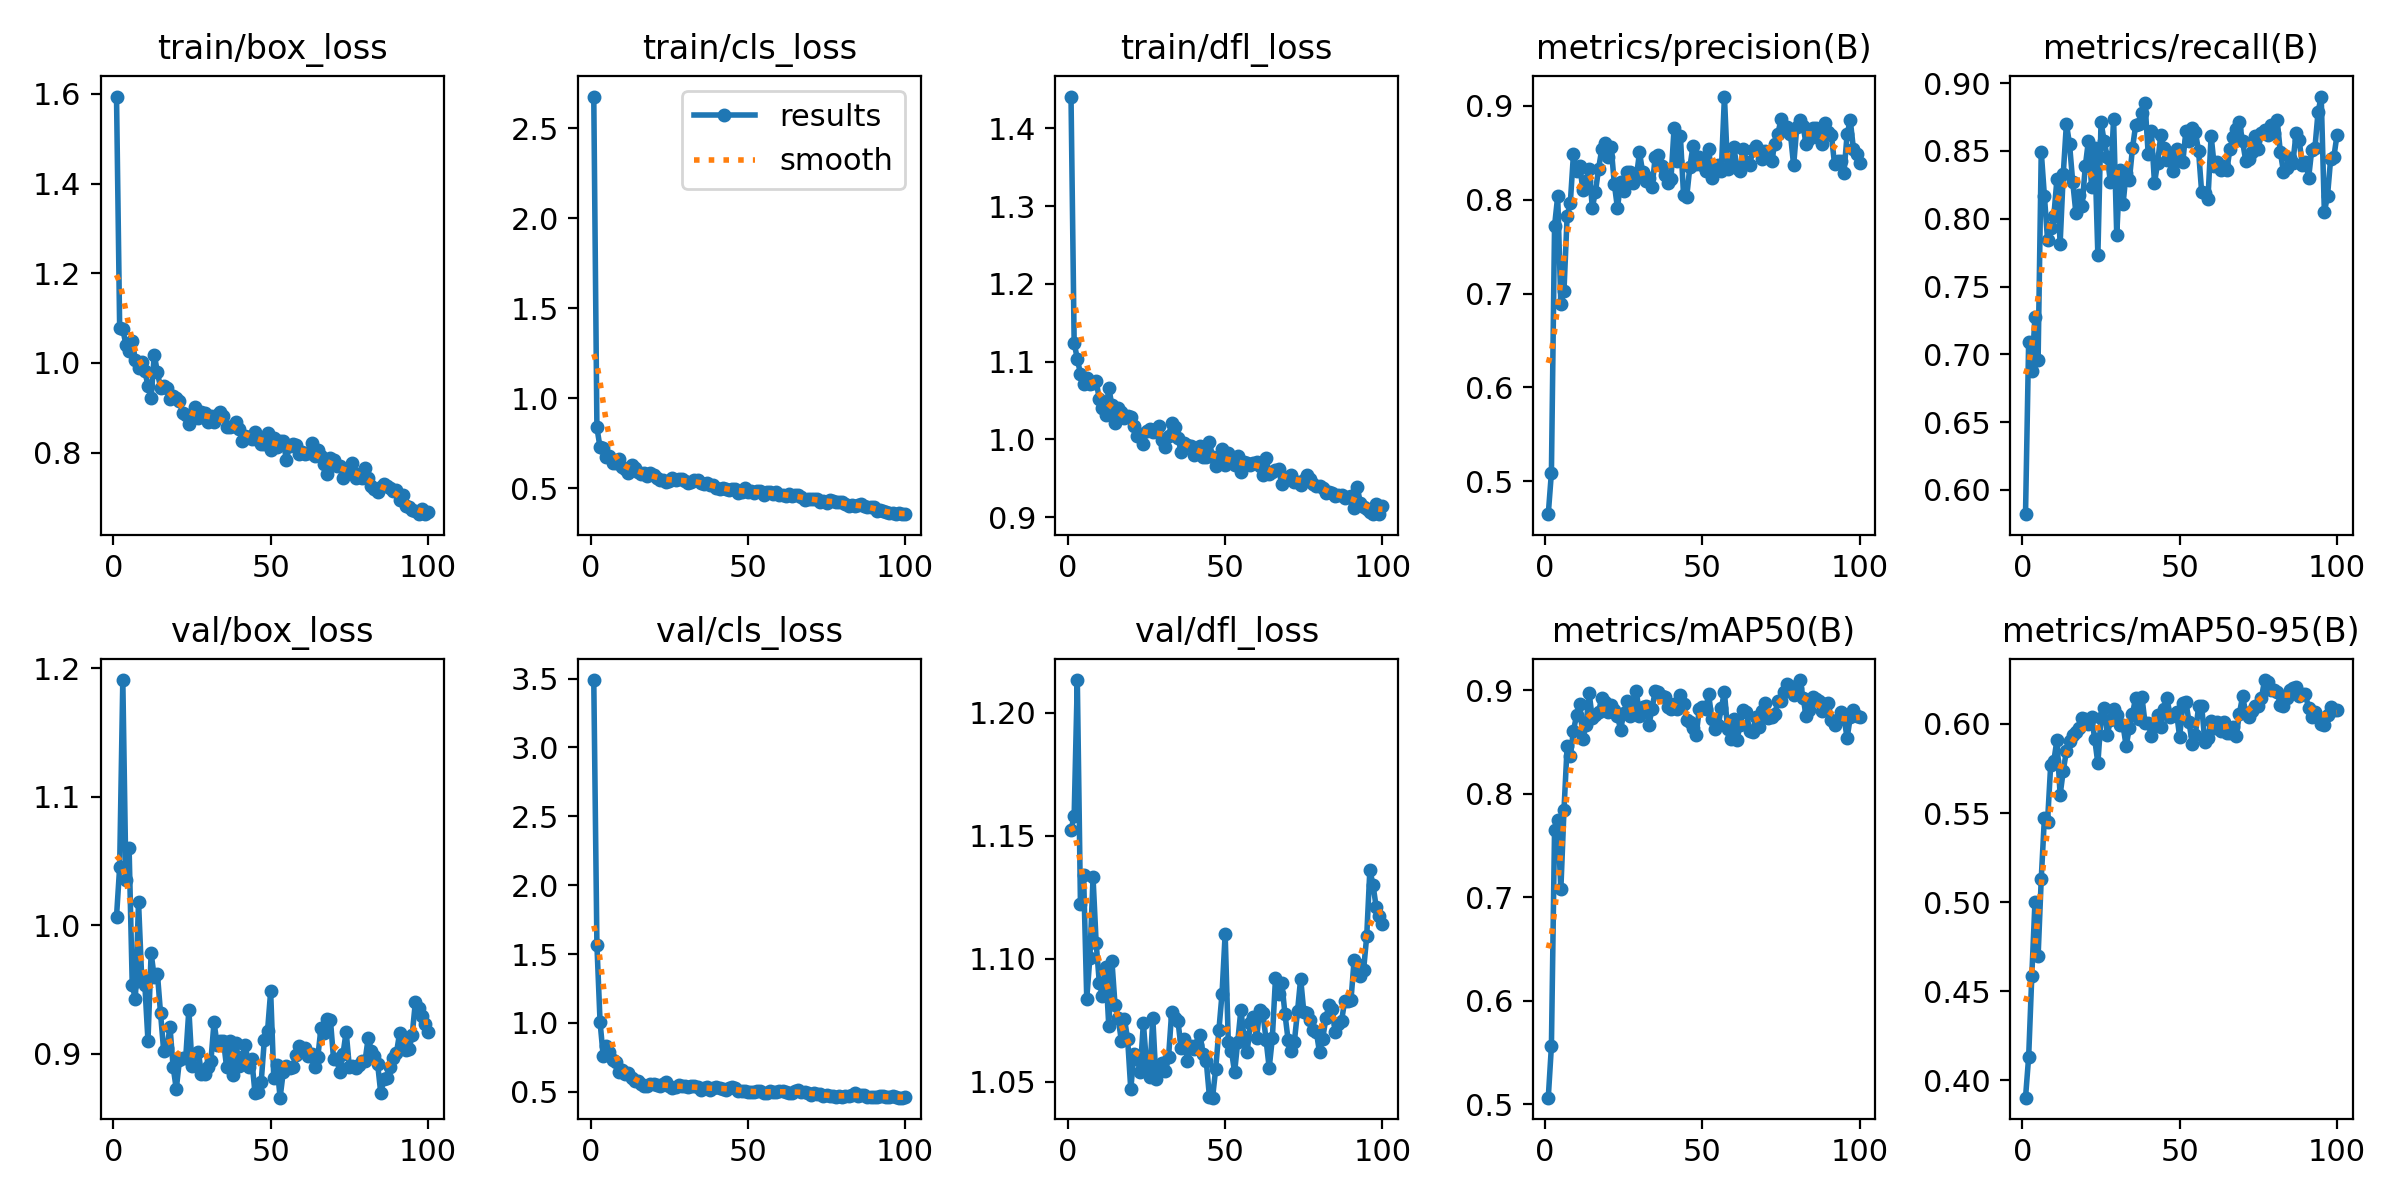

In [8]:
from IPython.display import Image, display
import os

# Define home directory and navigate to it
HOME = os.getcwd()  # Adjust this if you have set HOME to a different path earlier
%cd {HOME}

# Define the path to the results image
result_image_path = os.path.join(HOME, 'runs', 'detect', 'train2', 'results.png')

# Check if the results image exists, then display it
if os.path.exists(result_image_path):
    display(Image(filename=result_image_path, width=600))
else:
    print("Results image not found. Ensure training has completed and the file path is correct.")


/content


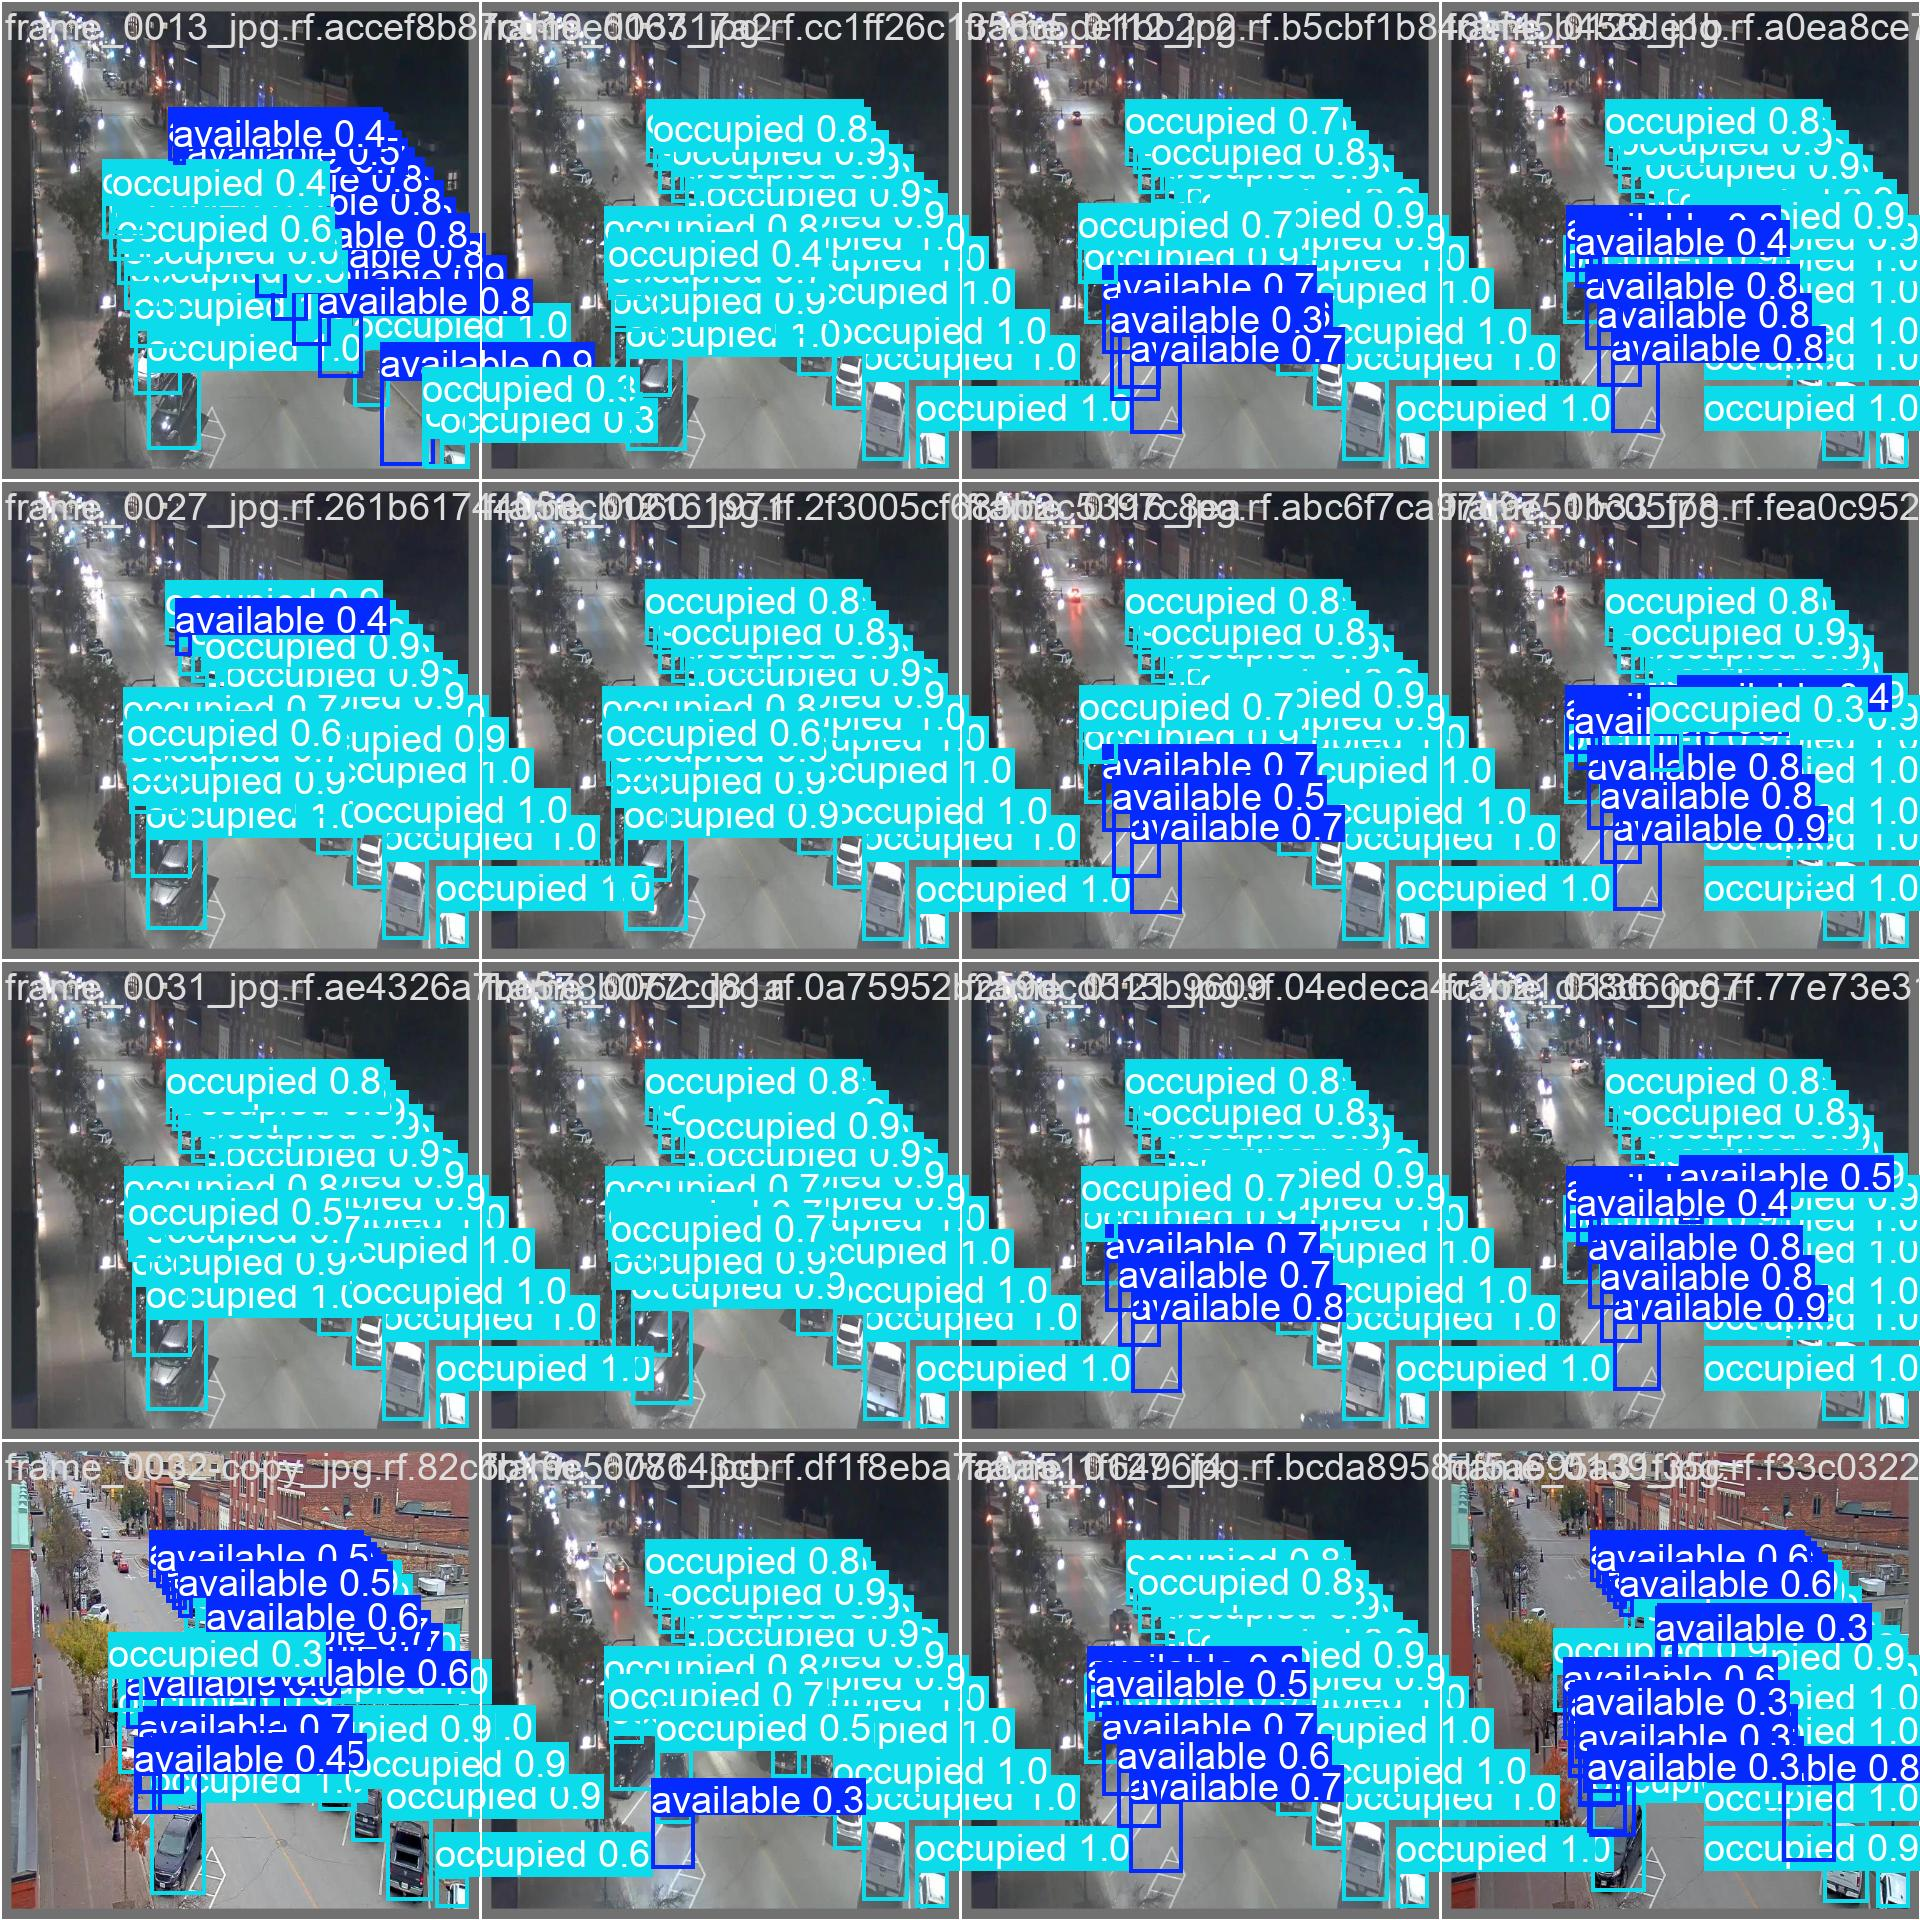

In [9]:
from IPython.display import Image, display
import os

# Define home directory and navigate to it
HOME = os.getcwd()  # Adjust this if HOME is set to a specific path
%cd {HOME}

# Define the path to the prediction image for the first validation batch
val_pred_image_path = os.path.join(HOME, 'runs', 'detect', 'train2', 'val_batch0_pred.jpg')

# Check if the image exists, then display it
if os.path.exists(val_pred_image_path):
    display(Image(filename=val_pred_image_path, width=600))
else:
    print("Prediction image not found. Ensure training has completed and the file path is correct.")


In [10]:
# Define the path to the best model and dataset
best_model_path = f"{HOME}/runs/detect/train2/weights/best.pt"
data_yaml_path = os.path.join(dataset_path, "data.yaml")

# Run the validation task
!yolo task=detect mode=val model={best_model_path} data={data_yaml_path}

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


In [11]:
# Define paths for the model and test images
best_model_path = f"{HOME}/runs/detect/train2/weights/best.pt"
test_images_path = "/content/drive/MyDrive/train/Car-Model-1/test/images"  # Ensure this path points to your test images folder

# Run the prediction task
!yolo task=detect mode=predict model={best_model_path} conf=0.25 source={test_images_path} save=True

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:567: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu'), file  # load


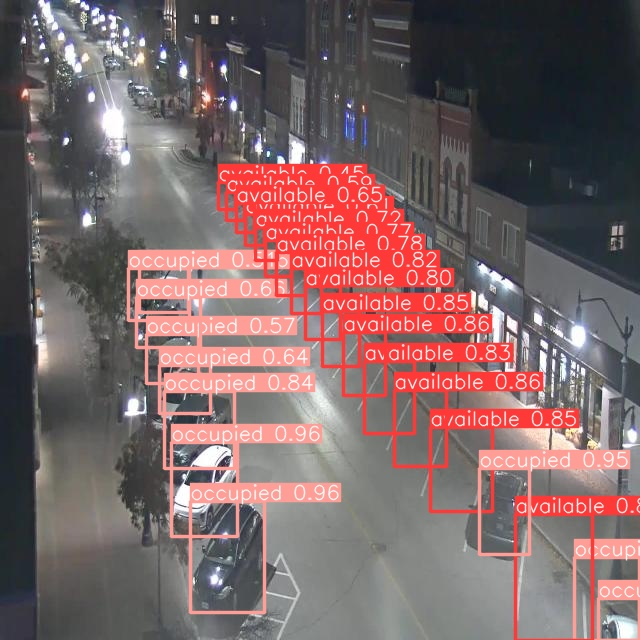

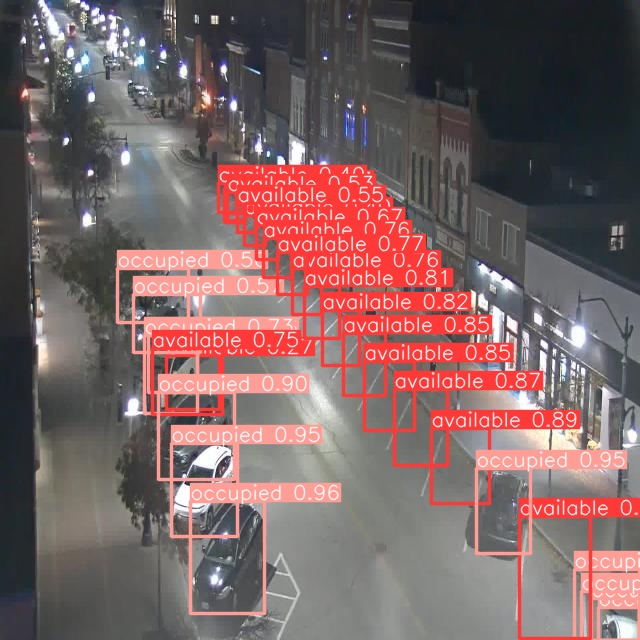

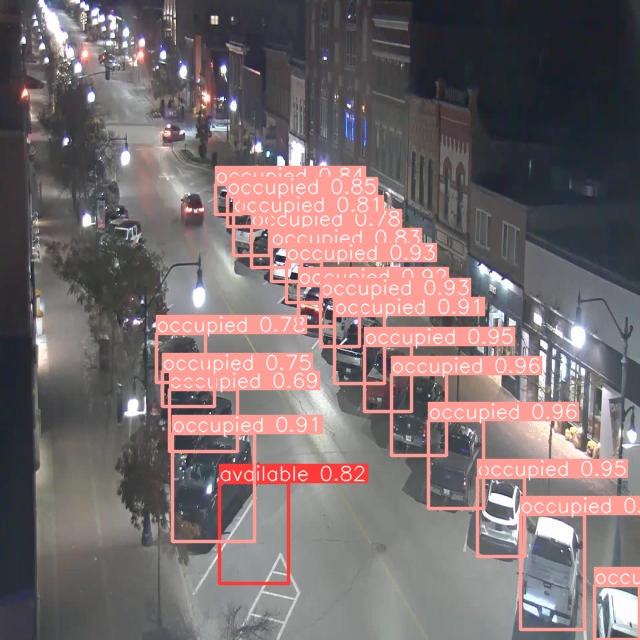

In [12]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = '/content/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [19]:
# Define the path to your trained model and the video source
best_model_path = f"{HOME}/runs/detect/train2/weights/best.pt"  # Path to your best model
video_path = "/content/BLK-HDPTZ12.mp4"  # Replace with the path to your .mp4 video
output_path = f"{HOME}/runs/detect/predict"  # Output directory for predictions

# Run the inference on the video
!yolo task=detect mode=predict model={best_model_path} source={video_path} conf=0.25 save=True save_txt=False

Streaming output truncated to the last 5000 lines.
video 1/1 (frame 4488/9484) /content/BLK-HDPTZ12.mp4: 384x640 12 occupieds, 10.8ms
video 1/1 (frame 4489/9484) /content/BLK-HDPTZ12.mp4: 384x640 12 occupieds, 10.8ms
video 1/1 (frame 4490/9484) /content/BLK-HDPTZ12.mp4: 384x640 12 occupieds, 10.8ms
video 1/1 (frame 4491/9484) /content/BLK-HDPTZ12.mp4: 384x640 13 occupieds, 12.0ms
video 1/1 (frame 4492/9484) /content/BLK-HDPTZ12.mp4: 384x640 13 occupieds, 10.9ms
video 1/1 (frame 4493/9484) /content/BLK-HDPTZ12.mp4: 384x640 13 occupieds, 10.8ms
video 1/1 (frame 4494/9484) /content/BLK-HDPTZ12.mp4: 384x640 13 occupieds, 11.6ms
video 1/1 (frame 4495/9484) /content/BLK-HDPTZ12.mp4: 384x640 13 occupieds, 10.8ms
video 1/1 (frame 4496/9484) /content/BLK-HDPTZ12.mp4: 384x640 12 occupieds, 10.9ms
video 1/1 (frame 4497/9484) /content/BLK-HDPTZ12.mp4: 384x640 12 occupieds, 10.8ms
video 1/1 (frame 4498/9484) /content/BLK-HDPTZ12.mp4: 384x640 12 occupieds, 10.7ms
video 1/1 (frame 4499/9484) /content

In [14]:
from roboflow import Roboflow
import os

# Initialize Roboflow with your API key
rf = Roboflow(api_key="DuUALsDkigOrBXEeJbEY")

project = rf.workspace("demo-2zyvl").project("car-model-4va6l")
version = project.version(1)

# Define the model path and type
model_path = f"{HOME}/runs/detect/train2/weights/best.pt"
model_type = "yolov8"

# Deploy the model to Roboflow
version.deploy(model_type=model_type, model_path=model_path)

print("Model deployed successfully!")


loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/demo-2zyvl/car-model-4va6l/1
Share your model with the world at: https://universe.roboflow.com/demo-2zyvl/car-model-4va6l/model/1
Model deployed successfully!


In [15]:
!cp -r /content/runs /content/drive/MyDrive/train/

In [16]:
!ls /content/drive/MyDrive/train/runs

detect
